<a href="https://colab.research.google.com/github/josbex/HS-detection_in_social_media_posts/blob/master/Plot_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
def get_stats(filename):
  df = pd.read_csv("/content/gdrive/My Drive/thesis/dataset/stats/" + filename +".tsv", sep="\t") 
  return df

In [4]:
#TODO: display accuracy and f1 score for each graph?
def plot_stats(train_loss, train_steps, val_loss, val_steps, title, name):
  fig = plt.figure()
  # plotting the line 1 points  
  plt.plot(train_steps, train_loss, label = "Train. Loss") 
  # plotting the line 2 points  
  plt.plot(val_steps, val_loss, label = "Val. Loss")  
  # naming the x axis 
  plt.xlabel('Steps') 
  # naming the y axis 
  plt.ylabel('Loss') 
  # giving a title to the graph 
  plt.title(title)  
  # show a legend on the plot 
  plt.legend() 
  # function to show the plot 
  plt.show() 
  fig.savefig("/content/gdrive/My Drive/thesis/dataset/plots/" + name + ".png")

In [49]:
t_stats = get_stats('training_stats/batch_size=32/training_stats_e=2_b=32_lr=2e-05')
print(t_stats.columns)

Index(['Epoch', 'Training Loss', 'Valid. Loss', 'Valid. Accur.',
       'Macro f-1 Score', 'Training Time', 'Validation Time'],
      dtype='object')


In [54]:
t_stats = get_stats('mid_training_stats/batch_size=32/mid_train_e=3_b=32_lr=2e-05')
print(t_stats.columns)

Index(['Epoch', 'Step', 'Training Loss'], dtype='object')


In [10]:
def prepare_validation_stats(stats):
  validation_loss = list(stats['Valid. Loss'])
  epochs = list(stats['Epoch'])
  step_size = 373 #size depends on batch size
  steps = []
  for e in epochs:
    steps.append(step_size*e)
  return validation_loss, steps

def get_max_step(stats):
  steps =[]
  for (step, epoch) in zip(stats['Step'], stats['Epoch']):
    steps.append(step)
    if(epoch > 1):
      return steps[len(steps)-2]

def calculate_steps(stats):
  steps = []
  max_step = get_max_step(stats)
  epoch_count = 0
  for (step, epoch) in zip(stats['Step'], stats['Epoch']):
    if(epoch == 1):
      steps.append(int(step))
    elif(epoch-1 > epoch_count):
      epoch_count+=1
      steps.append((max_step*epoch_count) + int(step))
    else:
      steps.append((max_step*epoch_count) + int(step))
  return steps

def prepare_training_stats(mid_stats, final_stats):
  training_loss = list(mid_stats['Training Loss'])
  epochs = list(final_stats['Epoch'])
  final_training_loss = list(final_stats['Training Loss'])
  steps = calculate_steps(mid_stats)
  step_size = 373
  steps.append(epochs[len(epochs)-1] * step_size)
  training_loss.append(final_training_loss[len(final_training_loss)-1])
  return training_loss, steps



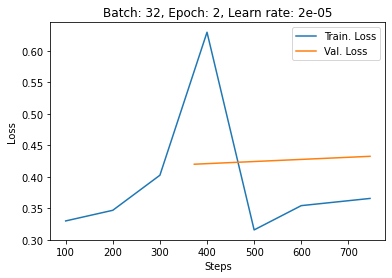

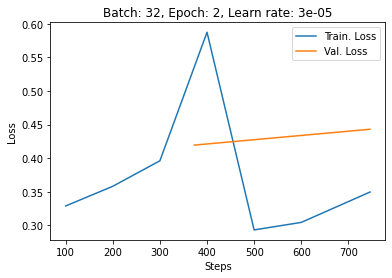

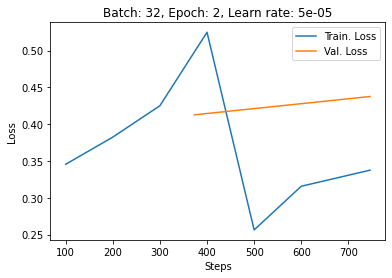

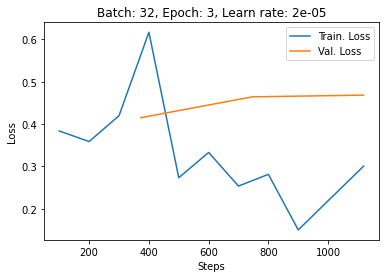

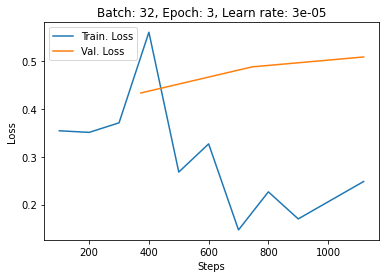

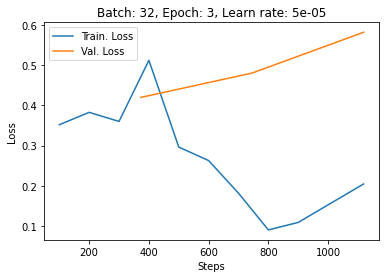

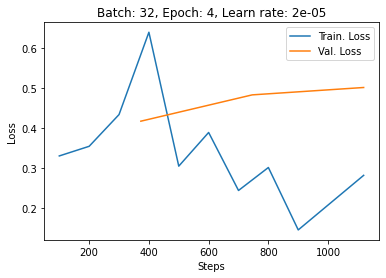

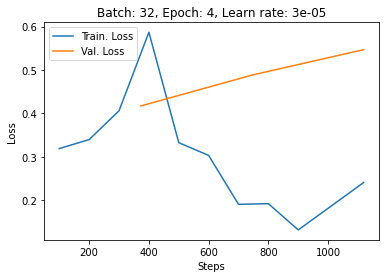

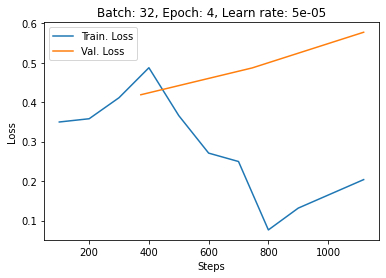

In [11]:
learn_rate = ['2e-05', '3e-05', '5e-05']
epochs = ['2', '3', '4']

val_str = 'training_stats/batch_size=32/training_stats_e={}_b=32_lr={}'.format(epochs[0], learn_rate[0])
train_str = 'mid_training_stats/batch_size=32/mid_train_e={}_b=32_lr={}'.format(epochs[0], learn_rate[0])

#TODO: add final training loss to the plot, so val and train loss end at the same points
def plot_all_combos():
  for epoch in epochs:
    for rate in learn_rate:
      v_stats = get_stats('training_stats/batch_size=32/training_stats_e={}_b=32_lr={}'.format(epoch, rate))
      t_stats = get_stats('mid_training_stats/batch_size=32/mid_train_e={}_b=32_lr={}'.format(epoch, rate))
      v_loss, v_steps = prepare_validation_stats(v_stats)
      t_loss, t_steps = prepare_training_stats(t_stats, v_stats)
      title ='Batch: 32, Epoch: ' + epoch + ', Learn rate: ' + rate
      plot_stats(t_loss, t_steps, v_loss, v_steps, title , title) 

plot_all_combos()